# DATA SCIENCE SESSIONS VOL. 3
### A Foundational Python Data Science Course
## Session 04: Numpy: basic vector arithmetic, linear algebra, and broadcasting.

[&larr; Back to course webpage](https://datakolektiv.com/)

Feedback should be send to [goran.milovanovic@datakolektiv.com](mailto:goran.milovanovic@datakolektiv.com). 

These notebooks accompany the DATA SCIENCE SESSIONS VOL. 3 :: A Foundational Python Data Science Course.

![](../img/IntroRDataScience_NonTech-1.jpg)

### Lecturers

[Goran S. Milovanović, PhD, DataKolektiv, Chief Scientist & Owner](https://www.linkedin.com/in/gmilovanovic/)

[Aleksandar Cvetković, PhD, DataKolektiv, Consultant](https://www.linkedin.com/in/alegzndr/)

[Ilija Lazarević, MA, DataKolektiv, Consultant](https://www.linkedin.com/in/ilijalazarevic/)

![](../img/DK_Logo_100.png)

***

## 0. What do we want to do today?

Our goal in Session 04 is to learn the basics of **Numpy**, a powerful number-crunching machinery that turn Python into a **vector programming language** - a kind of language ideally suited for mathematical statistics and Data Science.  

Along the way we will begin to understand how Numpy runs under Pandas and what is the relationship between them. And the basics of vector and matrix arithmetic in Numpy, of course. And how to vectorize a function with Numpy. And plenty of other things as well! 

### Where am I?


In [1]:
import os
work_dir = os.getcwd()
print(work_dir)
print(os.listdir(work_dir))
data_dir = os.path.join(work_dir, "_data")
print(os.listdir(data_dir))

C:\Users\alegza\Desktop\Data_Science\dss03python2023\session04
['.ipynb_checkpoints', 'dss03_py_session04.html', 'dss03_py_session04.ipynb', 'dss05_py_session04.ipynb', 'tasklist04.html', 'tasklist04.ipynb', 'tasklist04_solutions.html', 'tasklist04_solutions.ipynb', '_data']
['just_numbers.txt', 'MovieRatings.csv', 'numpy_array.csv', 'numpy_array_2.csv']


## 1. Arrays

In [2]:
# first, of course, we import numpy
import numpy as np

# and we'll need pandas at some point as well
import pandas as pd

As Data Frames are the main actors of Pandas module, so are the _**arrays**_ the main actors of Numpy module. The most well-known arrays are *vectors* and *matrices*, and are types of arrays that we will be working throughout this course. Mathematically, arrays represent _**tensors**_. 

Each array/tensor is a mathematical object containing multitude of values, and _**array dimensionality**_ represents a number of *indices* we need in order to locate a given value within a given array. 

For example, let's observe the following **vector**:

$$\mathbf{v} = (2, 0, -1, 5).$$

We want to locate value -1. When asked *Where is -1 located?*, we answer: *On the **3rd** position.*. Se what happened there? We needed just one index in order to locate it. Therefore, **vectors are one-dimensional arrays**.

More generally, we write vectors as

$$\mathbf{v} = (v_1, v_2, \ldots, v_n),$$

where its every element $v_i$ is determined by only one index $i$. 

***

Now, observe the following **matrix**:
    
$$A = 
\begin{pmatrix}
3 & -1\\
0 & 2
\end{pmatrix}.
$$

We want to locate value -1 again. Where do we find it? In the **1st row** and the **2nd column**. So, now we needed two indices in order to locate it. Therefore, **matrices are two-dimensional arrays**.

More generally, we write matrices as

$$A = 
\begin{pmatrix}
a_{11} & a_{12} & \cdots & a_{1n}\\
a_{21} & a_{22} & \cdots & a_{2n}\\
\vdots & \vdots & \ddots & \vdots\\
a_{m1} & a_{m2} & \cdots & a_{mn}\
\end{pmatrix}.
$$

where its every element $a_{ij}$ is determined by two indices $ij$, where the first one $i$ stands for the row number, and the second one $j$ stands for column number. 

***

3-, 4-, and other higher-dimensional arrays would require 3, 4, and more indices to locate one of its elements. They can be represented, respectively, as "cubic", 4D, 5D, etc. matrices. 

And what about zero-dimensional arrays? Well, those are just our good old numbers, which we can sometimes refer as _**scalars**_.

But now, how do we create and manipulate those objects in Python, i.e. Numpy?

## 2. Vectors

One of the most direct ways to create a vector in Numpy is by casting a list into a vector by using `np.array()` function.

In [3]:
#defining a vector
v = np.array([2, 0, -1, 5])
v

array([ 2,  0, -1,  5])

In [4]:
type(v)

numpy.ndarray

`ndarray` stands for *n-dimensional array*; and, as we saw - vectors are one-dimensional arrays:

In [5]:
v.ndim

1

But, doesn't vector $\mathbf{v}$ have 4 dimensions?

In [6]:
v.shape

(4,)

Yes, but that's the dimensionality of the particular vector $\mathbf{v}$. But the *(array) dimensionality* of vector $\mathbf{v}$, or any other vector, as an *array object*, is always *one*, regardless of its number of coordinates. 

***

Allright, and how we locate, say -1 value of vector $\mathbf{v}$ using Numpy? Simple, the same way as with lists! (where indexing starts, of course, from 0)

In [7]:
v[2]

-1

Vectors can also be sliced as lists:

In [8]:
vec = np.array([3, 7.5, -1.111, 46, 91, 0, 3])

vec[2:6]

array([-1.111, 46.   , 91.   ,  0.   ])

In [9]:
vec[2:]

array([-1.111, 46.   , 91.   ,  0.   ,  3.   ])

In [10]:
vec[:6]

array([ 3.   ,  7.5  , -1.111, 46.   , 91.   ,  0.   ])

In [11]:
vec[1:6:2]

array([ 7.5, 46. ,  0. ])

We can subset a vector using list of coordinates:

In [12]:
vec[[1, 3, 6]]

array([ 7.5, 46. ,  3. ])

***

But what makes list and vectors different. First thing, lists in Python can contain elements of different data types, while vectors (and, generally, all Numpy arrays) have elements only of a **single type**.

In [13]:
l = [1, "abcd", -3.2]

In [14]:
vec_l = np.array([1, "abcd", -3.2])

In [15]:
vec_l.dtype

dtype('<U32')

This means that all of array elements are converted into strings!

In [16]:
type(vec_l[0])

numpy.str_

In [17]:
#but
vec.dtype

dtype('float64')

In [18]:
type(vec[0])

numpy.float64

Even if we defined the first element of `vec` as an integer, `np.array()` has cast it into a float. We can actually pass `dtype` argument into `np.array()` to specify the type of its elements:

In [19]:
vec_a = np.array([1, 2, 3, 4])

vec_a.dtype

dtype('int32')

In [20]:
vec_a = np.array([1, 2, 3, 4], dtype='float')

vec_a.dtype

dtype('float64')

In [21]:
vec_a

array([1., 2., 3., 4.])

In [22]:
vec_b = np.array([1, 2.2, 3.8, 4], dtype='int')

vec_b

array([1, 2, 3, 4])

In [23]:
vec_l = np.array([1, "abcd", -3.2], dtype='int')

ValueError: invalid literal for int() with base 10: 'abcd'

What are some other ways to create vectors in Numpy?

In [24]:
# repetition
np.repeat(4, repeats=10)

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

`np.arange()` and `np.linspace()` are quite useful:

In [25]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [26]:
np.arange(3, 10)

array([3, 4, 5, 6, 7, 8, 9])

In [27]:
np.arange(3, 10, 2)

array([3, 5, 7, 9])

In [28]:
np.arange(3, 10, .2)

array([3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. , 5.2, 5.4,
       5.6, 5.8, 6. , 6.2, 6.4, 6.6, 6.8, 7. , 7.2, 7.4, 7.6, 7.8, 8. ,
       8.2, 8.4, 8.6, 8.8, 9. , 9.2, 9.4, 9.6, 9.8])

In [29]:
np.linspace(1, 10, 10)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [30]:
np.linspace(1, 10, 17)

array([ 1.    ,  1.5625,  2.125 ,  2.6875,  3.25  ,  3.8125,  4.375 ,
        4.9375,  5.5   ,  6.0625,  6.625 ,  7.1875,  7.75  ,  8.3125,
        8.875 ,  9.4375, 10.    ])

In [31]:
np.linspace(1, 10, 17).shape

(17,)

In [32]:
np.linspace(1, 10, 17, dtype='int')

array([ 1,  1,  2,  2,  3,  3,  4,  4,  5,  6,  6,  7,  7,  8,  8,  9, 10])

You can use `np.zeros()` and `np.ones()` to create vectors of all zeros or ones:

In [33]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [34]:
np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

***

Similarly as with Pandas, we can select vector elements using conditions and logical operators. 

In [35]:
vec = np.linspace(1, 100, 100)
print(vec)

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100.]


In [36]:
cond = vec > 50
print(cond)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


In [37]:
vec[cond]

array([ 51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,
        62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,
        73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,
        84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,
        95.,  96.,  97.,  98.,  99., 100.])

In [40]:
# or simply
vec[vec < 50]

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49.])

In [41]:
vec[(vec < 50) & (vec > 10)]

array([11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23.,
       24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36.,
       37., 38., 39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49.])

***

Geometrically, a n-dimensional vector can be represented as a point in n-dimensional space, or as an 'arrow' from the coordinate center to the given point. This interpretation is actually quite important for machine learning, as every datapoint can be abstracted to a point in a higher-dimensional space. In this manner a dataset becomes a set of points in space with its geometry, and machine learning algorithms work by exploiting the geometry of the dataset.

### 2.1. Elementwise operations with vectors

One thing we can do with vectors/numpy arrays is perform mathematical operations, which we can't do with lists... at least no in an elegant fashion as with Numpy.

Vector addition/subtraction (which is performed elementwise)

$$\mathbf{u} + \mathbf{v} = (u_1, u_2, \ldots, u_n) \pm (v_1, v_2, \ldots, v_n) = (u_1\pm v_1, u_2\pm v_2, \ldots, u_n\pm v_n).$$

In [42]:
v1 = np.array([3, 2, 1])
v2 = np.array([7, 9, 5])

v1 + v2

array([10, 11,  6])

In [43]:
v1 - v2

array([-4, -7, -4])

What if we had lists?

In [44]:
l1 = [3, 2, 1]
l2 = [7, 9, 5]

l1 + l2

[3, 2, 1, 7, 9, 5]

Not what we really wanted... We would have to do something like this:

In [45]:
l_sum = []

for x, y in zip(l1, l2):
    l_sum.append(x + y)
    
l_sum

[10, 11, 6]

Not quite as elegant as with Numpy...

We can also multiply vector by a scalar

$$\lambda\mathbf{v} = \lambda(v_1, v_2, \ldots, v_n) = (\lambda v_1, \lambda v_2, \ldots, \lambda v_n).$$

This operation has an interesting interpretation:

- if $\lambda > 1$, then it elongates the vector $\mathbf{v}$;
- if $\lambda < 1$, then it contracts the vector $\mathbf{v}$.

In [46]:
v1 = np.array([3, 2, 1])

4*v1

array([12,  8,  4])

A _**vector norm**_ measures the _**intesity**_, i.e. the 'size' of the vector, i.e. the distance of the point from the coordinate center. There are many vector norms, and we'll speak about them more later in the course, but the most used one is _**Euclidean norm**_ or $L_2$ norm:

$$||\mathbf{v}|| = \sqrt{v_1^2 + v_2^2 + \cdots + v_n^2}.$$

In [47]:
np.linalg.norm(v1)

3.7416573867739413

In [48]:
np.linalg.norm(4*v1)

14.966629547095765

In [49]:
np.linalg.norm(.25*v1)

0.9354143466934853

`linalg` in `np.linalg` is a submodule of Numpy used for performing many beautiful calculations from Linear Algebra. 

Furthermore, we can do elementwise vector product:

In [50]:
v1 = np.array([3, 2, 1])
v2 = np.array([7, 9, 5])

v1*v2

array([21, 18,  5])

However, mathematically, this isn't *true* vector product; we'll talk more about vector products later on.  

We can also do elementwise vector division (true vector division mathematically isn't even defined), and all kind of other mathematically dubious vector elemetwise operations with Numpy (which can be still quite useful!)

In [51]:
v1/v2

array([0.42857143, 0.22222222, 0.2       ])

In [52]:
v1/7

array([0.42857143, 0.28571429, 0.14285714])

In [53]:
7/v1

array([2.33333333, 3.5       , 7.        ])

In [54]:
# but this is not mathematically correct square of a vector!
v1**2

array([9, 4, 1], dtype=int32)

In [55]:
2**v1

array([8, 4, 2], dtype=int32)

In [56]:
v2**v1

array([343,  81,   5], dtype=int32)

What makes Numpy perform these elemetwise operations so seamlessly? It's due to  _**vectorization**_ and _**broadcasting**_.

### 2.2. Vectorization and Broadcasting

Vectorization is another Numpy feature which lets you perform various mathematical operations on Numpy arrays elementwise, which is impossible to do directly on lists. 


Say, we want to find a square root of every element in a given list:

In [57]:
import math

l = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

math.sqrt(l)

TypeError: must be real number, not list

List comprehension might be a way to go:

In [58]:
[math.sqrt(el) for el in l]

[3.1622776601683795,
 4.47213595499958,
 5.477225575051661,
 6.324555320336759,
 7.0710678118654755,
 7.745966692414834,
 8.366600265340756,
 8.94427190999916,
 9.486832980505138,
 10.0]

But Numpy offers a more elegant way to do it!

In [59]:
np.sqrt(l)

array([ 3.16227766,  4.47213595,  5.47722558,  6.32455532,  7.07106781,
        7.74596669,  8.36660027,  8.94427191,  9.48683298, 10.        ])

And not only square root, you can use many many more mathematical functions in this manner:

In [60]:
np.sin(l)

array([-0.54402111,  0.91294525, -0.98803162,  0.74511316, -0.26237485,
       -0.30481062,  0.77389068, -0.99388865,  0.89399666, -0.50636564])

In [61]:
np.exp(l)

array([2.20264658e+04, 4.85165195e+08, 1.06864746e+13, 2.35385267e+17,
       5.18470553e+21, 1.14200739e+26, 2.51543867e+30, 5.54062238e+34,
       1.22040329e+39, 2.68811714e+43])

In [62]:
np.abs(np.sin(l))

array([0.54402111, 0.91294525, 0.98803162, 0.74511316, 0.26237485,
       0.30481062, 0.77389068, 0.99388865, 0.89399666, 0.50636564])

In [63]:
np.round(np.cos(l), 3)

array([-0.839,  0.408,  0.154, -0.667,  0.965, -0.952,  0.633, -0.11 ,
       -0.448,  0.862])

In [64]:
#or easier
np.cos(l).round(3)

array([-0.839,  0.408,  0.154, -0.667,  0.965, -0.952,  0.633, -0.11 ,
       -0.448,  0.862])

What happens here is that Numpy *vectorizes* the given function over the given vector/list and applies it on its every element.

Now let's vectorize our own function:

In [65]:
def plus_one(x):
    return x + 1

In [66]:
plus_one(l)

TypeError: can only concatenate list (not "int") to list

In [67]:
plus_one_vec = np.vectorize(plus_one)
plus_one_vec(l)

array([ 11,  21,  31,  41,  51,  61,  71,  81,  91, 101])

**N.B.** Call to `plus_one_vec()`, i.e. `plus_one_vec(l)` has automatically turned the `l` list into a Numpy vector before execution. Now `plus_one_v()` is a *vectorized* version of `plus_one()`.

Now, let's assume that the probabilities of options `A`, `B`, `A1`, and `B1` are known to the decision maker, and that we have, of course, $P(A)+P(B)=1$ and $P(A1)+P(B1)=1$:

- **P(A) = .55**: Stay home, watch a movie. (costs \$5 to rent a movie via online services)
- **P(B) = .45**: Go to cinema, watch a movie. (costs \$10 to buy a ticket)


- **P(A1) = .75**: Stay home, play a board game. (costs \$10 to buy a board game)
- **P(B1) = .25**: Go to the board game club, play a board game. (costs \$3.5 to enter the club)

Now, with the utility function of exponent $\rho=.67$, the decision maker evaluates **the expected utility** of lotteries $(A, B)$ and $(A1, B1)$ in the following way:

In [68]:
# - power-utility function exponent:
rho = .67

# lottery (A,B)
pa = .55
pb = .45
ca = 5
cb = 10
eu_ab = pa*ca**rho + pb*cb**rho
print("EU(A,B) = " + str(eu_ab))

# lottery (A1,B1)
pa1 = .75
pb1 = .25
ca1 = 10
cb1 = 3.5
eu_a1b1 = pa1*ca1**rho + pb1*cb1**rho
print("EU(A1,B1) = " + str(eu_a1b1))

EU(A,B) = 3.7216687887050215
EU(A1,B1) = 4.086729704552689


And since monetary values constitue costs in this example, the decision maker - if cares only about the utility of money - should choose $(A,B)$ over $(A1,B1)$ according to the principle of Maximum Expected Utility.

A Python function to compute the expected utility of a lottery:

In [69]:
def eu(p1, p2, v1, v2, rho):
    leu = p1*v1**rho + p2*v2**rho
    return(leu)
    
# test eu()
eu(p1=.75, p2=.25, v1=10, v2=3.5, rho=.67)

4.086729704552689

Ok, now that works. However: what if we need to evaluate many lotteries at once?

In [70]:
pA = [.15, .33, .84]
vA = [10, 20, 30]
pB = [.85, .77, .16]
vB = [8, 17, 45]
lots = pd.DataFrame({'pA':pA,
                     'vA':vA,
                     'pB':pB,
                     'vB':vB})
lots

,pA,vA,pB,vB
0,0.15,10,0.85,8
1,0.33,20,0.77,17
2,0.84,30,0.16,45


Vectorized `eu()` via Numpy:

In [71]:
def eu_v(lotteries, rho):
    uA = np.power(lotteries['vA'], rho)
    uB = np.power(lotteries['vB'], rho)
    leu = pA*uA+pB*uB
    return leu

In [72]:
eu_v(lots,rho)

0     4.125252
1     7.595015
2    10.252668
dtype: float64

**Yes:** you can perform vectorized operations and use vectorized functions on `pd.DataFrame` columns.
**Remember:** a `pd.Series` object is, essentialy, a `np.array` with an index attached.

Check (first lottery only):

In [73]:
pA[0]*vA[0]**rho + pB[0]*vB[0]**rho

4.125251582123641

Check (second lottery only):

In [74]:
pA[1]*vA[1]**rho + pB[1]*vB[1]**rho

7.595014907577726

**N.B.** `np.vectorize` is not really recommended. As the Numpy documentation states:
> The vectorize function is provided primarily for convenience, not for performance. The implementation is essentially a for loop.
[numpy.vectorize](https://numpy.org/doc/stable/reference/generated/numpy.vectorize.html)

You should always write your own vectorized functions with Numpy.

***

Adding (or subtracting) vector and a scalar is not mathematically well-defined operation

$$\mathbf{v} \pm \lambda$$

However, with Numpy we can still do it!

In [75]:
v1

array([3, 2, 1])

In [76]:
v1 + 1

array([4, 3, 2])

In [77]:
v1 - 2

array([ 1,  0, -1])

By the grace of _**broadcasting**_, Numpy can handle this. What happens here actually? It's quite simple: Numpy *broadcasts* a scalar to an array of corresponding shape and performs the given operation:

$$\mathbf{v} + \lambda \rightarrow (v_1, v_2, \ldots, v_n) \pm (\lambda, \lambda, \ldots, \lambda).$$

### 2.4. Vector products

One of the most important vector product in machine learning is the _**dot**_/_**inner**_/_**scalar**_ product of two vectors. Inner product of two vectors is a _**scalar**_ computed using the following formula:

$$\mathbf{u}\cdot\mathbf{v} = \sum_{i=1}^n u_iv_i.$$

Basically, it means the following: multiple two vectors elementwise, and sum all the elements. 

![](../img/dot.png)

In Numpy, we do it using `np.dot()` or `@` operator (which is preferred, since it's faster than `np.dot()`).

In [78]:
v1 = np.array([3, 2, 1])
v2 = np.array([7, 9, 5])

In [79]:
np.dot(v1, v2)

44

In [80]:
v1 @ v2

44

Dot product is used in language models to measure how words are similar to one another - as words can be *embedded* as vectors into high-dimensional space. 

***

<img src="..\img\perceptron.png" width="250">

_**Perceptron**_ is the simplest possible neural network. It consists of *input vector* $\mathbf{x} = (x_1, x_2, \ldots, x_k)$, *weights* $\mathbf{w} = (w_1, w_2, \ldots, w_k)$, (non-linear) *activation function* $f$ and output $\hat{y}$.

Weights $\mathbf{w}$ are the learnable parameter of the model, and perceptron calculates output value $\hat{y}$ via

$$ \hat{y} = f(\mathbf{x}\cdot\mathbf{w}). $$

A perceptron learns model parameters in two steps:
- forward feed
- backpropagation.

In *forward feed* we simply calculate the output value $\hat{y}$ from the given input $\mathbf{x}$ and current weights $\mathbf{w}$ via the above formula. The value $\hat{y}$ is in fact the predicted value of the target variable $y$. 

*Backpropagation* is where the perceptron improves itself by updating its weights. It is a much complex affair than the forward-feed, as it requires some advanced math, involving partial derivatives, chain rules, tensor algebra and numerical optimization. We won't go into details of backprobagation, as it fairly surpasses the scope of this course. 

Say, we have trained a simple perceptron to predict weight of a fish given its dimension. Assume that we have obtained the following weight via training procedure:

In [81]:
weights = np.array([9.77, 1.23, 1.11])

And our fish has has the following `length`, `height` and `width` dimensions:

In [82]:
fish = np.array([23.2, 11.52, 4.02])

We predict fish weight by using the dot product:

In [83]:
predict = np.max(fish @ weights, 0)
predict

245.29579999999999

`np.max(x, 0)` is called *ReLU* function, and it is often used as an activation function in neural networks.

***

Another type of vector product you might come across is _**outer product**_. Outer product of two vectors is a **matrix**. Assume the both vectors $\mathbf{u}$ & $\mathbf{v}$ are n-dimensional. Then, their outer product gives $n\times n$ matrix defined by

$$\mathbf{u} \otimes \mathbf{v} = [u_iv_j]$$

![](../img/outer.png)

We perfomr outer product in Numpy using `np.outer()`. 

In [84]:
v1 = np.array([3, 2, 1])
v2 = np.array([7, 9, 5])

np.outer(v1, v2)

array([[21, 27, 15],
       [14, 18, 10],
       [ 7,  9,  5]])

For outer product, vectors needn't be the same size.

In [85]:
v3 = np.array([-1, 0, 1, 10])

In [86]:
np.outer(v1, v3)

array([[-3,  0,  3, 30],
       [-2,  0,  2, 20],
       [-1,  0,  1, 10]])

The outer product is not comutative!

In [87]:
np.outer(v3, v1)

array([[-3, -2, -1],
       [ 0,  0,  0],
       [ 3,  2,  1],
       [30, 20, 10]])

So, we have already took a peak into matrices, so let's move on to see what we can do with Numpy and matrices.

## 3. Matrices

As we said before - matrices are two-dimensional arrays, as we always need two indices to locate any of its elements. Each matrix has a $n\times m$ shape, where $n$ represnts the number of its *rows* and $m$ number of its *columns*. Rows and columns of a matrix are also often referred as its *axes*.

The most straightforward way to define matrix in Numpy is to cast a nested list of lists:

In [88]:
l = [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]]

A = np.array(l)
A

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [89]:
A.shape

(3, 4)

Remember the difference between the `.shape` and `.ndim`!

In [90]:
A.ndim

2

Every matrix will have its *array dimensionality* equal to two, regardless of its shape.

You can also create matrices from vectors by *reshaping* them using `.reshape()`:

In [91]:
v = np.arange(1, 13)
v

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [92]:
v.reshape(2, 6)

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12]])

In [93]:
v.reshape(4, 3)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [94]:
# BUT!
v.reshape(7, 3)

ValueError: cannot reshape array of size 12 into shape (7,3)

When reshaping, you must always make sure you can reshape your vector into compatible shape. You can see more on reshaping in this session's tasklist.

Another way to create a matrix from vectors is by stacking them using `np.vstack()`.

In [95]:
v1 = np.array([3, 2, 1])
v2 = np.array([7, 9, 5])
v4 = np.array([1, 0, 2])

np.vstack([v1, v2, v4])

array([[3, 2, 1],
       [7, 9, 5],
       [1, 0, 2]])

In [96]:
# matrix of ones
np.ones(shape=(3, 4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [97]:
# matrix of zeros
np.zeros((5, 2))

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

A very important matrix in linear algebra is the *identity matrix*, which has ones on its main diagonal, and zeros elsewhere:

In [98]:
np.identity(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

Identity matrix is a special case of *diagonal matrix*:

In [99]:
np.diag([-2, 3.14, 6, 1])

array([[-2.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  3.14,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  6.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  1.  ]])

A very important operation for matrices is _**matrix transpose**_ which reverses its axes (i.e. matrix transpose makes it rows into a columns and vice versa). If $A = [a_{ij}]$ is some matrix of $m\times n$ shape, then its transpose is:

$$A^T = [a_{ji}],$$

and it is of shape $n\times m$.

To perform matrix transpose in Numpy, just attach `.T` to a matrix.

In [100]:
A

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [101]:
A.shape

(3, 4)

In [102]:
A.T

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [103]:
A.T.shape

(4, 3)

***

In order to select a given element of a matrix, you need two indices:

In [104]:
B = np.arange(1, 31).reshape(5, 6)
B

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29, 30]])

In [105]:
B[1, 4]

11

In [106]:
B[4, 1]

26

The first coordinate always corresponds to rows, and the second to columns.

We can also slice matrices by rows, colums, or bothways.

In [107]:
# slicing by rows
B[3:]

array([[19, 20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29, 30]])

In [108]:
B[:3]

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18]])

In [109]:
B[1:4:2]

array([[ 7,  8,  9, 10, 11, 12],
       [19, 20, 21, 22, 23, 24]])

In [110]:
# slicing by columns
B[:, 3:]

array([[ 4,  5,  6],
       [10, 11, 12],
       [16, 17, 18],
       [22, 23, 24],
       [28, 29, 30]])

In [111]:
B[:, :3]

array([[ 1,  2,  3],
       [ 7,  8,  9],
       [13, 14, 15],
       [19, 20, 21],
       [25, 26, 27]])

In [112]:
B[:, 1:4:2]

array([[ 2,  4],
       [ 8, 10],
       [14, 16],
       [20, 22],
       [26, 28]])

In [113]:
# bothways
B[1:4, 2:5]

array([[ 9, 10, 11],
       [15, 16, 17],
       [21, 22, 23]])

In [114]:
B[1:, :5]

array([[ 7,  8,  9, 10, 11],
       [13, 14, 15, 16, 17],
       [19, 20, 21, 22, 23],
       [25, 26, 27, 28, 29]])

You can also select particular rows/columns using indexing.

In [115]:
# whole rows
B[[0, -1, 2]]

array([[ 1,  2,  3,  4,  5,  6],
       [25, 26, 27, 28, 29, 30],
       [13, 14, 15, 16, 17, 18]])

In [116]:
# whole columns
B[:, [0, -1, 2]]

array([[ 1,  6,  3],
       [ 7, 12,  9],
       [13, 18, 15],
       [19, 24, 21],
       [25, 30, 27]])

In [117]:
# particular elements
B[[0, -1, 2], [1, 3, 0]]

array([ 2, 28, 13])

In [118]:
B

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29, 30]])

We can also use `np.ix_` to subset a submatrix from a given matrix.

In [119]:
B[np.ix_([1, 4])]

array([[ 7,  8,  9, 10, 11, 12],
       [25, 26, 27, 28, 29, 30]])

In [120]:
B[np.ix_([1, 4], [0, 3, 5])]

array([[ 7, 10, 12],
       [25, 28, 30]])

You can also use conditional indexing on matrices, but it will reduce it to vector of values satisfying given conditions.

In [121]:
C = np.linspace(1, 100, 100).reshape(10, 10)
print(C)

[[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
 [ 11.  12.  13.  14.  15.  16.  17.  18.  19.  20.]
 [ 21.  22.  23.  24.  25.  26.  27.  28.  29.  30.]
 [ 31.  32.  33.  34.  35.  36.  37.  38.  39.  40.]
 [ 41.  42.  43.  44.  45.  46.  47.  48.  49.  50.]
 [ 51.  52.  53.  54.  55.  56.  57.  58.  59.  60.]
 [ 61.  62.  63.  64.  65.  66.  67.  68.  69.  70.]
 [ 71.  72.  73.  74.  75.  76.  77.  78.  79.  80.]
 [ 81.  82.  83.  84.  85.  86.  87.  88.  89.  90.]
 [ 91.  92.  93.  94.  95.  96.  97.  98.  99. 100.]]


In [122]:
c_cond = C[(C < 50) & (C > 10)]
c_cond

array([11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23.,
       24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36.,
       37., 38., 39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49.])

In [123]:
c_cond.ndim

1

### 3.1 Array reduction

Say, we want to sum all the elements of a given matrix. We can do it using `np.sum()`.

In [124]:
B

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29, 30]])

In [125]:
np.sum(B)

465

In [126]:
# or like this
B.sum()

465

In this manner we have reduced our matrix to a single number. But what if we wanted to sum by every row/column. Then we need to specify an axis.

In [127]:
# row-reduction
np.sum(B, axis=0)

array([65, 70, 75, 80, 85, 90])

By specifying `axis=0`, we have performed *row-reduction* by suming every row, column-by-column. Effectively we have obtained a sum of every column in this manner.

In [128]:
# another way to do it
B.sum(0)

array([65, 70, 75, 80, 85, 90])

More formally, if we have matrix $B = [b_{ij}]$ of shape $m\times n$, we reduce it to n-dimensional vector $\mathbf{x}$ with elements

$$x_j = \sum_{i=1}^m b_{ij}\qquad j=1,\ldots,n.$$

In [129]:
np.sum(B, axis=1)

array([ 21,  57,  93, 129, 165])

By specifying `axis=1`, we have performed *column-reduction* by suming every column, row-by-row. Effectively we have obtained a sum of every row in this manner.

In [130]:
# another way to do it
B.sum(1)

array([ 21,  57,  93, 129, 165])

More formally, if we have matrix $B = [b_{ij}]$ of shape $m\times n$, we reduce it to m-dimensional vector $\mathbf{y}$ with elements

$$y_i = \sum_{j=1}^n b_{ij}\qquad i=1,\ldots,m.$$

We can use many other operations in this manner, such as `np.mean()`, `np.max()`, `np.min()`, etc.

In [131]:
# whole matrix reduction
np.mean(B)

15.5

In [132]:
# row-reduction
np.mean(B, axis=0)

array([13., 14., 15., 16., 17., 18.])

In [133]:
# column-reduction
B.mean(1)

array([ 3.5,  9.5, 15.5, 21.5, 27.5])

A pair of very useful Numpy functions which can perform array reduction are `np.any()` and `np.all()` which can check whether at leas one, or all, elements of the array satisfy a given condition.

In [134]:
B

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29, 30]])

In [135]:
np.any(B > 15)

True

In [136]:
np.any(B > 15, axis=0)

array([ True,  True,  True,  True,  True,  True])

In [137]:
np.any(B > 15, axis=1)

array([False, False,  True,  True,  True])

In [138]:
np.all(B > 15)

False

In [139]:
np.all(B > 15, axis=0)

array([False, False, False, False, False, False])

In [140]:
np.all(B > 15, axis=1)

array([False, False, False,  True,  True])

### 3.2. np.nan

Missing values in Numpy are represented as `np.nan`. Let's see what happens if we wanted to apply some of the array-reducing functions defined above to an array containing missing values.

In [141]:
C = np.array([[1, np.nan, 2], [3, 4, 5], [np.nan, np.nan, 7]])
C

array([[ 1., nan,  2.],
       [ 3.,  4.,  5.],
       [nan, nan,  7.]])

In [142]:
C.mean()

nan

Ooops...

In [143]:
C.mean(0)

array([       nan,        nan, 4.66666667])

In [144]:
C.mean(1)

array([nan,  4., nan])

Can we do something about it? Maybe using some conditional slicing? Here `np.isnan()` can help which returns `True` if a value is `np.nan`, and otherwise `False`.

In [145]:
np.isnan(C)

array([[False,  True, False],
       [False, False, False],
       [ True,  True, False]])

In [146]:
C[~np.isnan(C)]

array([1., 2., 3., 4., 5., 7.])

In [147]:
C[~np.isnan(C)].mean()

3.6666666666666665

In [148]:
# But whatch out!
C[~np.isnan(C)].mean(0)

3.6666666666666665

In [149]:
C[~np.isnan(C)].mean(1)

AxisError: axis 1 is out of bounds for array of dimension 1

This is not what we wanted - we wanted row/column-reduction. Luckily Numpy has a handy function in store for us: `np.nanmean()`.

In [150]:
np.nanmean(C)

3.6666666666666665

In [151]:
np.nanmean(C, axis=0)

array([2.        , 4.        , 4.66666667])

In [152]:
np.nanmean(C, axis=1)

array([1.5, 4. , 7. ])

And there's pletora of these 'nan-handling' functions in Numpy to make our life easier when faced with `np.nan`, such as `np.nansum()`, `np.nanmax()`, etc, which all allow array-reduction.

In [153]:
np.sum(C)

nan

In [154]:
np.nansum(C)

22.0

In [155]:
np.nansum(C, axis=1)

array([ 3., 12.,  7.])

### 3.3. Elementwise operations with matrices

As with vectors, we can define add/subtract two matrices $A = [a_{ij}]$ and $B = [b_{ij}]$:


$$ A \pm B = [a_{ij} \pm b_{ij}]. $$

In [156]:
A = np.array([[1, 2], [3, 4]])
A

array([[1, 2],
       [3, 4]])

In [157]:
B = np.array([[1, 0], [2, 3]])
B

array([[1, 0],
       [2, 3]])

In [158]:
A + B

array([[2, 2],
       [5, 7]])

In [159]:
A - B

array([[0, 2],
       [1, 1]])

We can also multiply matrix $A = [a_{ij}]$ by a scalar $\lambda$:

$$\lambda A = [\lambda a_{ij}].$$

In [160]:
4*A

array([[ 4,  8],
       [12, 16]])

In [161]:
# and even do this
A/4

array([[0.25, 0.5 ],
       [0.75, 1.  ]])

We can multiply two matrices elementwise, but mathematically, this is not a *true* matrix product:

In [162]:
A*B

array([[ 1,  0],
       [ 6, 12]])

As with vectors, Numpy allows us to perform all kinds of elementwise mathematical atrocities on matrices:

In [163]:
4/A

array([[4.        , 2.        ],
       [1.33333333, 1.        ]])

In [164]:
A**3

array([[ 1,  8],
       [27, 64]], dtype=int32)

In [165]:
3**A

array([[ 3,  9],
       [27, 81]], dtype=int32)

In [166]:
B/A

array([[1.        , 0.        ],
       [0.66666667, 0.75      ]])

In [167]:
A**B

array([[ 1,  1],
       [ 9, 64]], dtype=int32)

***

Vectorization and broadcasting also work on matrices.

In [168]:
np.sqrt(A)

array([[1.        , 1.41421356],
       [1.73205081, 2.        ]])

In [169]:
np.exp(A)

array([[ 2.71828183,  7.3890561 ],
       [20.08553692, 54.59815003]])

In [170]:
np.log(A).round(4)

array([[0.    , 0.6931],
       [1.0986, 1.3863]])

And broadcasting as well

In [171]:
A + 1

array([[2, 3],
       [4, 5]])

But, broadcasting can a bit more interesting with matrices:

In [172]:
A

array([[1, 2],
       [3, 4]])

In [173]:
A + np.array([1, 2])

array([[2, 4],
       [4, 6]])

In [174]:
A + np.array([1, 2, 3])

ValueError: operands could not be broadcast together with shapes (2,2) (3,) 

### 3.4. Random Arrays 

`np.random` is a submodule of Numpy that lets us create arrays of random numbers with various underlying distributions. We'll use this submodule quite a lot later in the course, but now we'll just introduce its basics.  

In order to use this submodule, we need first to set up a **_random number generator_** (RNG) using some preset _**seed**_. RNGs with the same seed will always produce the same sequence of random numbers, which is very convenient if we want to reproduce the same stochastic outcomes across different sessions and devices.

In [175]:
rng = np.random.default_rng(seed=1023)

To create a single random number, just invoke `.random()` from the RNG; this will output _**uniformly at random**_ a single number in (0, 1) interval. 

In [176]:
rng.random()

0.3388690800085262

If we want to produce arrays of random numbers, we just need to input the shape of an array as an argument in `.random()`:

In [177]:
#random vector
rng.random(5)

array([0.90589874, 0.90960195, 0.74722338, 0.82310232, 0.26763656])

In [178]:
#random matrix
rng.random((3, 4))

array([[0.08770086, 0.26731961, 0.70165033, 0.77665833],
       [0.37364504, 0.16165231, 0.30668439, 0.29964548],
       [0.74861583, 0.77756489, 0.41837499, 0.28090607]])

Of course, this will always give arrays with elements in the interval (0, 1). If we wanted to obtain radnom numbers in some $(a, b)$, we need to apply the following transformation:

$$(b-a)\mathbf{R} + a,$$

where $\mathbf{R}$ is some random array with values from (0, 1). 

Say, we want a $3\times 3$ random matrix with elements from the (1, 3) interval. Then, we do:

In [179]:
(3-1)*rng.random((3, 3)) + 1

array([[1.64791418, 2.79781784, 1.63019139],
       [2.65456578, 1.09530772, 2.51737659],
       [2.64654227, 1.26135216, 1.8672306 ]])

Notice the use of scalar-matrix multiplication and broadcasting here?

### 3.5. Matrix products

A mathematically proper matrix product between two matrices $A = [a_{ik}]$ of shape $m\times l$ and $B = [b_{kj}]$ of shape $l\times n$ is a $m\times n$ matrix with elemets defined as:

$$AB = [c_{ij}] = \Big[\sum_{k=1}^l a_{ik}b_{kj}\Big].$$

Basically, every element of $c_{ij}$ is a *scalar product* of $i$-th row of matrix $A$ and $j$-th column of matrix $B$.

We perform matrix product in Numpy by using `np.dot()` or `@` operator. (And **not** using `*`!)

In [180]:
A = np.array([[1, 0, -1, 1], [0, -1, 1, 0]])
A

array([[ 1,  0, -1,  1],
       [ 0, -1,  1,  0]])

In [181]:
A.shape

(2, 4)

In [182]:
B = np.array([[1, 0], [0, 1], [-1, 0], [0, -1]])
B

array([[ 1,  0],
       [ 0,  1],
       [-1,  0],
       [ 0, -1]])

In [183]:
B.shape

(4, 2)

In [184]:
A @ B

array([[ 2, -1],
       [-1, -1]])

In [185]:
np.dot(A, B)

array([[ 2, -1],
       [-1, -1]])

In [186]:
np.dot(A, B).shape

(2, 2)

In [187]:
A*B

ValueError: operands could not be broadcast together with shapes (2,4) (4,2) 

Matrix product is not comutative, i.e. $AB \neq BA$

In [188]:
A @ B

array([[ 2, -1],
       [-1, -1]])

In [189]:
B @ A

array([[ 1,  0, -1,  1],
       [ 0, -1,  1,  0],
       [-1,  0,  1, -1],
       [ 0,  1, -1,  0]])

We can perform matrix product on matrices on different shape, but they need to be compatible.

In [190]:
C = np.array([[1, 2, 3], [3, 5, 6]])
C

array([[1, 2, 3],
       [3, 5, 6]])

In [191]:
C.shape

(2, 3)

In [192]:
A @ C

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 4)

In [ ]:
B @ C

In [193]:
C @ B

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 3)

Identity matrix acts as a *neutral element*, it doesn't change a matrix it is multiplied with, the same way as when you multiply a number by 1:

In [194]:
D = np.array([[1, 2], [3, 4]])
I = np.identity(2)

D @ I

array([[1., 2.],
       [3., 4.]])

![](../img/matrix_prod.png)

***

_**Outer product**_ of two matrices $A = [a_{ij}]$ and $B = [b_{ij}]$ of shapes $n\times n$ is a **matrix** of shape $n^2\times n^2$, where every element of first matrix is multiplied by every element of the second. More formally:

$$A\otimes B = [a_ib_j].$$

In Numpy we use `np.outer()` to perform outer product of two matrices.

In [195]:
E = np.arange(0, 9).reshape(3, 3)
E

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [196]:
F = np.arange(9, 18).reshape(3, 3)
F

array([[ 9, 10, 11],
       [12, 13, 14],
       [15, 16, 17]])

In [197]:
np.outer(E, F)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  9,  10,  11,  12,  13,  14,  15,  16,  17],
       [ 18,  20,  22,  24,  26,  28,  30,  32,  34],
       [ 27,  30,  33,  36,  39,  42,  45,  48,  51],
       [ 36,  40,  44,  48,  52,  56,  60,  64,  68],
       [ 45,  50,  55,  60,  65,  70,  75,  80,  85],
       [ 54,  60,  66,  72,  78,  84,  90,  96, 102],
       [ 63,  70,  77,  84,  91,  98, 105, 112, 119],
       [ 72,  80,  88,  96, 104, 112, 120, 128, 136]])

In [198]:
np.outer(E, F).shape

(9, 9)

<img src="..\img\matrix_outer.png" width="500">

### 3.6. Matrix-vector product

_**Matrix-vector product**_ is one of the most important operations in Linear Algebra and Machine Learning. *Right matrix-vector product* is a product between matrix $A =[a_{ij}]$ of shape $m\times n$ and $n$-dimensional vector $\mathbf{v}$ is $m$-dimensional **vector**, with its elements defined as:

$$(A\mathbf{v})_i = \sum_{j=1}^n a_{ij}v_j,\qquad i=1,\ldots,m.$$

Basically, $i$-th element of the vector $A\mathbf{v}$ is a *scalar product* between $i$-th row of matrix $A$ and a vector $\mathbf{v}$.

Or, $A\mathbf{v}$ can be considered as a matrix product between matrix $A$ and a vector $\mathbf{v}$ considered as a matrix of shape $n\times 1$ (called also _**column matrix**_).

We perform (right) matrix-vector product in Numpy using either `np.dot()` or `@` operator.

In [199]:
A = np.arange(0, 12).reshape(3, 4)
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [200]:
v1 = np.array([0, 1, -1, 2])

In [201]:
np.dot(A, v1)

array([ 5, 13, 21])

In [202]:
A @ v1

array([ 5, 13, 21])

*Left matrix-vector product* is a product between a $m$-dimensional vector $\mathbf{v}$ and matrix $A =[a_{ij}]$ of shape $m\times n$ is $n$-dimensional **vector**, with its elements defined as:

$$(\mathbf{v}^TA)_j = \sum_{i=1}^m a_{ij}v_i,\qquad j=1,\ldots,n.$$

Basically, $j$-th element of the vector $\mathbf{v}^TA$ is a *scalar product* between vector $\mathbf{v}$ and $j$-th column of matrix $A$.

Or, $\mathbf{v}^TA$ can be considered as a matrix product between vector $\mathbf{v}^T$ considered as a matrix of shape $1\times m$ (called also _**row matrix**_) and a matrix $A$.

Left matrix-vector product is used less than the right one, and it is implemented in Numpy the same way: via `np.dot()` or `@` operator.

In [203]:
v2 = np.array([-1, 0, 1]) 

In [204]:
np.dot(v2, A)

array([8, 8, 8, 8])

In [205]:
v2 @ A

array([8, 8, 8, 8])

![](../img/matrix_vector.jpeg)

Geometrically, a matrix maps a vector/point-in-space to another vector/point-in-space via matrix-vector product. We can also say that a matrix *transforms* a vector. For example, matrix

In [206]:
B = np.array([[1, 2, 0], [3, -1, 4], [0, 5, 1]])

transform vector

In [207]:
vec = np.array([1, 0, 0])

to a vector

In [208]:
B @ vec

array([1, 3, 0])

If we have a set of points in space, then a matrix will *linearly* transform this set. In fact, it is through a matrix-vector product that a true mathematical nature of matrices is revealed - matrix is a representation of a *linear transformation/deformation* of a space, as space can be considered as a set of all the possible points. Let's illustrate this. (and don't worry about this code, it's for illustrative purposes only!)

In [215]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import matplotlib.gridspec as gridspec
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [216]:
def plotTransformedData(original_df, trans_df, colors, size, limits):
    
    fig = plt.figure(figsize=(18, 5))
    spec = gridspec.GridSpec(nrows=1, ncols=2, figure=fig)
    ax_0 = fig.add_subplot(spec[0, 0])
    ax_1 = fig.add_subplot(spec[0, 1])
    
    for ax in [ax_0, ax_1]:
        ax.set_xlim(limits[0], limits[1])
        ax.set_xticks(np.arange(limits[0] + .25, limits[1], .5))
        ax.set_xlabel('x', fontname='serif')
        ax.set_ylim(limits[2], limits[3])
        ax.set_yticks(np.arange(limits[2] + .25, limits[3], .5))
        ax.set_ylabel('y', fontname='serif')
        
        
    ax_0.scatter(original_df['x'], original_df['y'], c=colors, s=size)
    ax_0.set_title('Original Data', fontname='serif', fontsize=16)
    
    ax_1.scatter(trans_df['x'], trans_df['y'], c=colors, s=size)
    ax_1.set_title('Transformed Data', fontname='serif', fontsize=16)

In [217]:
data = np.array([[x, y] for x in [0, .2, .4, .6, .8, 1] for y in [0, .2, .4, .6, .8, 1]])

In [218]:
data = pd.DataFrame(data, columns=['x', 'y'])
data

,x,y
0,0.0,0.0
1,0.0,0.2
2,0.0,0.4
3,0.0,0.6
4,0.0,0.8
5,0.0,1.0
6,0.2,0.0
7,0.2,0.2
8,0.2,0.4
9,0.2,0.6


In [219]:
r = (data['x'].values - data['x'].min())/(data['x'].max() - data['x'].min())
g = np.zeros(len(r))
b = np.zeros(len(r))

colors = np.array([r, g, b]).T
sizes = data['x'].values*100 + data['y'].values*10 + 10
limits = [-2.25, 2.25, -2.25, 2.25]

In [220]:
# -------------------- Define X NumpPy Array -------------------- #
# Data Matrix
X = data.values


# -------------------- Define 13 NumPy Arrays -------------------- #
I = np.eye(2)

A1 = -I #reflection
A2 = np.diag([.5, 1]) #contraction
A3 = np.array([[np.cos(np.pi/4), -np.sin(np.pi/4)], [np.sin(np.pi/4), np.cos(np.pi/4)]]) #rotation
A4 = np.diag([-1, 1]) #reflection
A5 = np.diag([1, 2]) #expansion
A6 = np.array([[1, 0], [.5, 1]]) #shearing
A7 = np.array([[1, .5], [0, 1]]) #shearing
A8 = np.fliplr(A1) #reflection
A9 = np.diag([1, 0]) #projection
A10 = np.diag([0, 1]) #projection
A11 = np.diag([1, -1]) #reflection
A12 = np.fliplr(I) #reflection
A13 = I #identity

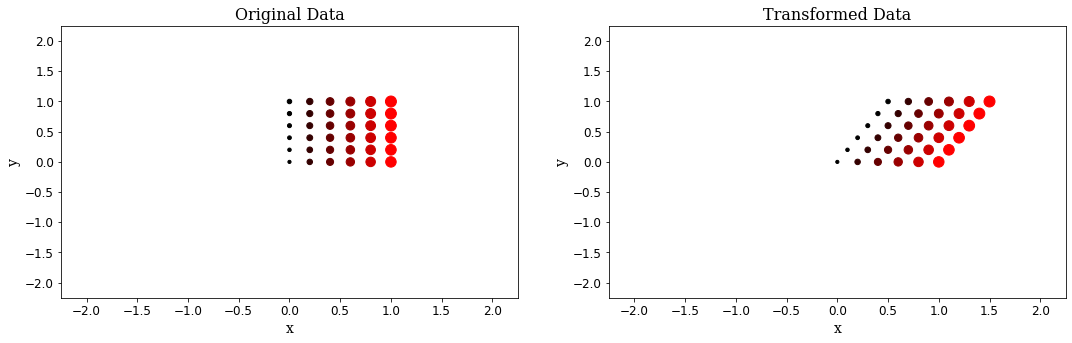

In [221]:
# Perform Matrix Multiplication
X_trans = A7@X.T

# Plot Transformation
data_trans = pd.DataFrame(X_trans.T, columns=['x', 'y'])
plotTransformedData(data, data_trans, colors=colors, size=sizes, limits=limits)

## 4. Three- and higher-dimensional arrays

Many things we said before regarding vectors and matrices can be (more-or-less) intuitively generalized to higher-dimensional arrays. For the illustration purposes, here we'll work with three-dimensional arrays only.

We can represent 3-dimensional arrays as "cubic matrices", where each 'slice' of this 3D array is a 2D matrix. Every element of a 3D array is determined by three indices. For example, element $a_{ijk}$ belongs to $j$-th row and $k$-th column of $i$-th slice/matrix of an array. 

We can also define 3D array in Numpy by casting from nested lists:

In [222]:
T = np.array([
            [[1, 2, 3], [4, 5, 6], [7, 8, 9]], 
            [[10, 11, 12], [13, 14, 15], [16, 17, 18]],
            [[19, 20, 21], [22, 23, 24], [25, 26, 27]]
                                                        ])
T

array([[[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9]],

       [[10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]],

       [[19, 20, 21],
        [22, 23, 24],
        [25, 26, 27]]])

In [223]:
T.shape

(3, 3, 3)

In [224]:
T.ndim

3

Or we can do it by vector reshaping, from `rng.random()`, etc...

In [225]:
K = np.arange(1, 25).reshape(3, 2, 4)
K

array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8]],

       [[ 9, 10, 11, 12],
        [13, 14, 15, 16]],

       [[17, 18, 19, 20],
        [21, 22, 23, 24]]])

In [226]:
rng.random((2, 3, 5))

array([[[0.07271263, 0.39638942, 0.80351088, 0.10134486, 0.34580118],
        [0.69768652, 0.53980059, 0.54679781, 0.03815066, 0.39936818],
        [0.97174967, 0.92946276, 0.41339343, 0.32846362, 0.23539889]],

       [[0.30868807, 0.20622709, 0.92177695, 0.8203502 , 0.62621573],
        [0.71169896, 0.41944266, 0.71884477, 0.21838528, 0.07710331],
        [0.68839601, 0.1169028 , 0.15159822, 0.18488999, 0.93080639]]])

We can search for elements using indexing, perform slicing...

In [227]:
K[2, 0, 3]

20

In [228]:
K[1:, :, 1:3]

array([[[10, 11],
        [14, 15]],

       [[18, 19],
        [22, 23]]])

In [229]:
K[np.ix_([0, 2], [1], [1, 2])]

array([[[ 6,  7]],

       [[22, 23]]])

Vectorization and broadcasting also work here.

In [230]:
np.sinh(K).round(2)

array([[[1.18000000e+00, 3.63000000e+00, 1.00200000e+01, 2.72900000e+01],
        [7.42000000e+01, 2.01710000e+02, 5.48320000e+02, 1.49048000e+03]],

       [[4.05154000e+03, 1.10132300e+04, 2.99370700e+04, 8.13774000e+04],
        [2.21206700e+05, 6.01302140e+05, 1.63450869e+06, 4.44305526e+06]],

       [[1.20774764e+07, 3.28299846e+07, 8.92411505e+07, 2.42582598e+08],
        [6.59407867e+08, 1.79245642e+09, 4.87240172e+09, 1.32445611e+10]]])

In [231]:
K + 1

array([[[ 2,  3,  4,  5],
        [ 6,  7,  8,  9]],

       [[10, 11, 12, 13],
        [14, 15, 16, 17]],

       [[18, 19, 20, 21],
        [22, 23, 24, 25]]])

In [232]:
K + np.ones(4)

array([[[ 2.,  3.,  4.,  5.],
        [ 6.,  7.,  8.,  9.]],

       [[10., 11., 12., 13.],
        [14., 15., 16., 17.]],

       [[18., 19., 20., 21.],
        [22., 23., 24., 25.]]])

In [233]:
K + np.array([[1, 1, 1, 1], [-1, -1, -1, -1]])

array([[[ 2,  3,  4,  5],
        [ 4,  5,  6,  7]],

       [[10, 11, 12, 13],
        [12, 13, 14, 15]],

       [[18, 19, 20, 21],
        [20, 21, 22, 23]]])

Array reduction also works here...

In [234]:
np.min(K)

1

In [235]:
np.min(K, axis=0)

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [236]:
np.min(K, axis=(0, 1))

array([1, 2, 3, 4])

In [237]:
np.min(K, axis=(0, 2))

array([1, 5])

You can also perform all kinds of elementwise operations on these arrays, as well as various exotic array products, but describing them all would require us to venture into the realm of Tensor Algebra, which is outside of our scope. 

## 5. Numpy and Pandas

Numpy and Pandas work perfectly in tandem. In fact - a Data Frame can be observed as 2D array, or more precisely, as 2D *indexed array*, while Series can be observed as 1D indexed arrays.

In [238]:
data_set = pd.read_csv(os.path.join(data_dir, "MovieRatings.csv"),
                       index_col=0)
data_set.head()

,FILM,RottenTomatoes,Metacritic,IMDB,Fandango_Stars
0,Avengers: Age of Ultron (2015),74,66,7.8,5.0
1,Cinderella (2015),85,67,7.1,5.0
2,Ant-Man (2015),80,64,7.8,5.0
3,Do You Believe? (2015),18,22,5.4,5.0
4,Hot Tub Time Machine 2 (2015),14,29,5.1,3.5


In [239]:
rt = data_set.iloc[:, 1]
rt[0:10]

0    74
1    85
2    80
3    18
4    14
5    63
6    42
7    86
8    99
9    89
Name: RottenTomatoes, dtype: int64

In [240]:
rt.mean()

60.84931506849315

In [241]:
rt.median()

63.5

In [242]:
rt.var()

910.1564478034952

In [243]:
rt.std()

30.16879924364732

In [244]:
rt + 1

0       75
1       86
2       81
3       19
4       15
      ... 
141     88
142     98
143     98
144    101
145     88
Name: RottenTomatoes, Length: 146, dtype: int64

You can do that in the DataFrame directly:

In [245]:
data_set['RottenTomatoes'] = data_set['RottenTomatoes'] + 1

In [246]:
data_set.head(5)

,FILM,RottenTomatoes,Metacritic,IMDB,Fandango_Stars
0,Avengers: Age of Ultron (2015),75,66,7.8,5.0
1,Cinderella (2015),86,67,7.1,5.0
2,Ant-Man (2015),81,64,7.8,5.0
3,Do You Believe? (2015),19,22,5.4,5.0
4,Hot Tub Time Machine 2 (2015),15,29,5.1,3.5


In [247]:
data_set['Metacritic'].mean()

58.80821917808219

In [248]:
data_set.mean()

<ipython-input-248-d38ade19696c>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_set.mean()


RottenTomatoes    61.849315
Metacritic        58.808219
IMDB               6.736986
Fandango_Stars     4.089041
dtype: float64

In [249]:
data_set.mean(1)

<ipython-input-249-5c60d097d30f>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_set.mean(1)


0      38.450
1      41.275
2      39.450
3      12.850
4      13.150
        ...  
141    41.600
142    47.925
143    49.475
144    50.575
145    41.550
Length: 146, dtype: float64

## 6. Linear Regression with Numpy

A group of ten students took tests A, B, and C. We are now interested in their performance on some test D taken in the end of their first year in college.

To our best knowledge, and knowing what major programs they have enrolled, we judge the test A result to be the most important indicator of their future performance, test B to be a little less relevant, and test C a poor indicator.

We hypothesize that 

- if we put some multiplicative weights on test results say, i.e.
- we weight test A (weight: $\beta_1$), test B (weight: $\beta_2$), and test C (weight: $\beta_3$)
- and add some constant, say $\beta_0$ to, $\beta_1A + \beta_2B + \beta_3C$ (let's represent the constant by $\beta_0$)
- we could predict their 1st year performance in college by

$$D = \beta_0 + \beta_1A + \beta_2B + \beta_3C$$

Following a convention, we could say that we have a linear regression model of the following form 

$$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_3$$

where $Y$ represents their 1st year performance on test D, while $X_1$, $X_2$, and $X_3$ stand for our A, B, and C test scores. We call $X_1$, $X_2$, and $X_3$ **the predictors**.

Let's assume that we already know the optimal values for $\beta_0$, $\beta_1$, $\beta_2$ and $\beta_3$, and that these values are:

- $\beta_0=7.96$,
- $\beta_1=5.71$,
- $\beta_2=2.23$, and
- $\beta_3=.65$.

We will also say that $\beta_0$, $\beta_1$, $\beta_2$, and $\beta_3$ are our **regression coefficients**

Given the following data, how could we make Numpy compute $Y$ - the model predictions - for us?

In [250]:
test_scores = pd.DataFrame({'A':[10, 7, 6, 2, 8, 8, 9, 5, 10, 7],
                            'B':[6, 3, 3, 7, 7, 1, 4, 2, 10, 9],
                            'C':[4, 5, 8, 7, 8, 9, 10, 2, 9, 10]})
test_scores

,A,B,C
0,10,6,4
1,7,3,5
2,6,3,8
3,2,7,7
4,8,7,8
5,8,1,9
6,9,4,10
7,5,2,2
8,10,10,9
9,7,9,10


In [251]:
test_scores.shape

(10, 3)

In [252]:
betas = np.array([7.96, 5.71, 2.23, .65])
betas

array([7.96, 5.71, 2.23, 0.65])

In [253]:
def linear_predict(design_matrix, coeffs):
    # - add a column of ones for the intercept term
    ones_column = np.ones((test_scores.shape[0], 1))
    aug_features = np.hstack((ones_column, design_matrix))
    # - compute the predictions
    predictions = np.dot(aug_features, coeffs)    
    return(predictions)

# - test
predictions = linear_predict(test_scores, betas)
print(predictions.shape)
print(predictions)

(10,)
[81.04 57.87 54.11 39.54 74.45 61.72 74.77 42.27 93.21 74.5 ]


Let's analyse this ^^ step by step.

Add a column of 1s for $\beta_0$ (the intercept) to the design matrix, to obtain an *augmented matrix*:

In [254]:
ones_column = np.ones((test_scores.shape[0], 1))
ones_column

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [255]:
aug_features = np.hstack((ones_column, test_scores))
aug_features

array([[ 1., 10.,  6.,  4.],
       [ 1.,  7.,  3.,  5.],
       [ 1.,  6.,  3.,  8.],
       [ 1.,  2.,  7.,  7.],
       [ 1.,  8.,  7.,  8.],
       [ 1.,  8.,  1.,  9.],
       [ 1.,  9.,  4., 10.],
       [ 1.,  5.,  2.,  2.],
       [ 1., 10., 10.,  9.],
       [ 1.,  7.,  9., 10.]])

The regression coefficients:

In [256]:
betas

array([7.96, 5.71, 2.23, 0.65])

Predict test score D:

In [257]:
np.dot(aug_features, betas)  

array([81.04, 57.87, 54.11, 39.54, 74.45, 61.72, 74.77, 42.27, 93.21,
       74.5 ])

Prediction of D for the first student (first row in `test_scores`):

In [258]:
7.96 + 5.71*10 + 2.23*6 + .65*4

81.03999999999999

### Further reading

Excellent read: [Introduction to Pandas and NumPy from Codecademy](https://www.codecademy.com/article/introduction-to-numpy-and-pandas)

### Readings and Videos
- [Bill Lubanovic, Introducing Python, 1st Edition](https://www.oreilly.com/library/view/introducing-python-2nd/9781492051374/), Chapter 4.
- [freeCodeCamp.org: Python NumPy Tutorial for Beginners](https://www.youtube.com/watch?v=QUT1VHiLmmI)
- [Rob Mulla: A Gentle Introduction to Pandas Data Analysis (on Kaggle)](https://www.youtube.com/watch?v=_Eb0utIRdkw)

***

DataKolektiv, 2022/23.

[hello@datakolektiv.com](mailto:goran.milovanovic@datakolektiv.com)

![](../img/DK_Logo_100.png)

<font size=1>License: [GPLv3](https://www.gnu.org/licenses/gpl-3.0.txt) This Notebook is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version. This Notebook is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details. You should have received a copy of the GNU General Public License along with this Notebook. If not, see http://www.gnu.org/licenses/.</font>